In [1]:
import numpy as np
import matplotlib.pyplot as plt


def generate_dataset_with_margin(size, margin, target_size=1000):
    np.random.seed(41)

    # Generating a larger number of random points

    X = np.random.normal(0, 2, size=(5 * target_size, 2))

    # Define a line as a decision boundary
    decision_boundary = np.random.rand(2)  # Random weights for the decision boundary
    decision_boundary /= np.linalg.norm(decision_boundary)  # Normalize to unit length

    # Compute distances from each point to the decision boundary
    distances = np.dot(X, decision_boundary)

    # Remove points falling inside the margin
    mask = (distances > margin / 2) | (distances < -margin / 2)
    X_filtered = X[mask][:target_size]
    y = np.where(distances[mask][:target_size] > 0, 1, -1)

    return X_filtered, y


# funtion to plot the generated datasets
def plot_datasets(dataset_size , gamma_values):
    for gamma in gamma_values:
        X, y = generate_dataset_with_margin(dataset_size, gamma)
        plt.figure(figsize=(5, 5))
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label=f'Gamma = {gamma}', alpha=0.7)
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], alpha=1.0)
        plt.title("Linearly Separable Datasets with Varying Gamma")
        plt.xlabel("Feature x")
        plt.ylabel("Feature y")
        plt.legend()
        plt.show()

        plt.figure(figsize=(5, 5))
        perceptron = Perceptron()
        converged_epocs , converged_iter = perceptron.train(X, y)
        weights = perceptron.weights
        bias = perceptron.bias
        x_line = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        y_line = (-weights[0] / weights[1]) * x_line - (bias / weights[1])
        plt.plot(x_line, y_line, color='red', label='Decision Boundary')

        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label=f'Gamma = {gamma}', alpha=0.7)
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], alpha=1.0)
        plt.title("Linearly Separable Datasets with Varying Gamma after classification")
        plt.xlabel("Feature x")
        plt.ylabel("Feature y")
        plt.legend()
        plt.show()


**perceptron class**

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        converged = False
        count_epocs = 0
        count_iter = 0
        for epoch in range(self.epochs):
            misclassifications = 0
            count_epocs += 1
            for i in range(X.shape[0]):
                prediction = np.dot(X[i], self.weights) + self.bias
                if y[i] * prediction <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    misclassifications += 1
                    count_iter += 1

            if misclassifications == 0:
                converged = True
                break

        if not converged:
            print("Perceptron did not converge within the specified number of epochs.")

        return count_epocs,count_iter

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)


**funtion to find average no of iterations**

In [3]:
def average_iterations_single_gamma(gamma, num_datasets=5):
    avg_iterations = []
    avg_epocs = []

    for _ in range(num_datasets):
        X_gamma, y_gamma = generate_dataset_with_margin(1000, gamma)
        perceptron = Perceptron()
        converged_epocs , converged_iter = perceptron.train(X_gamma, y_gamma)
        avg_iterations.append(converged_iter)
        avg_epocs.append(converged_epocs)
    return np.mean(avg_iterations) , np.mean(avg_epocs)


**plotting the linearly separable dataset without and with classifier**

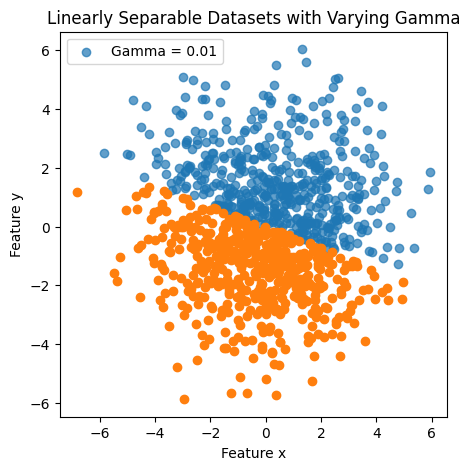

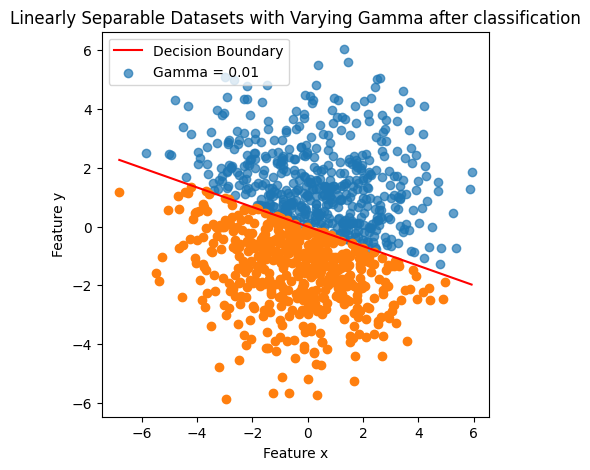

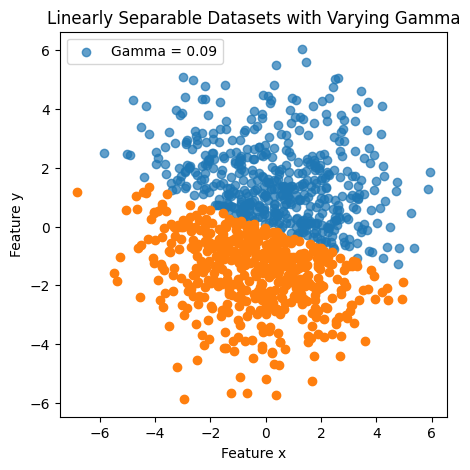

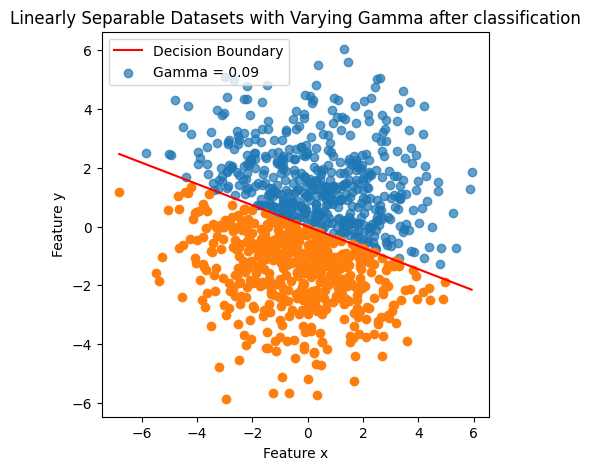

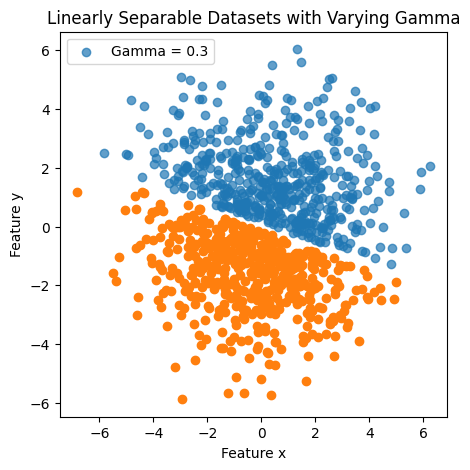

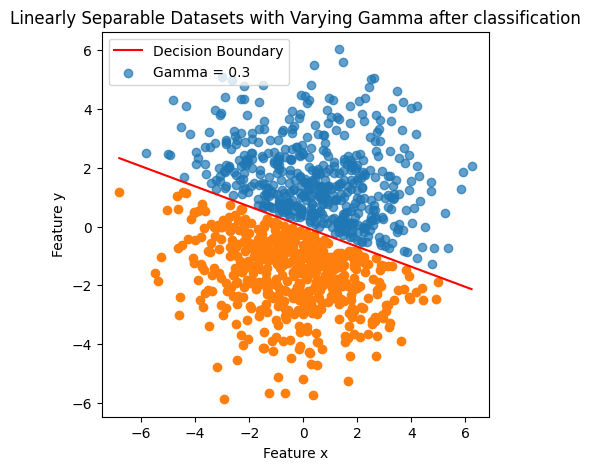

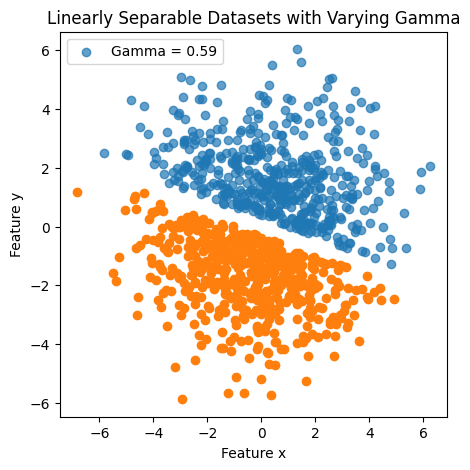

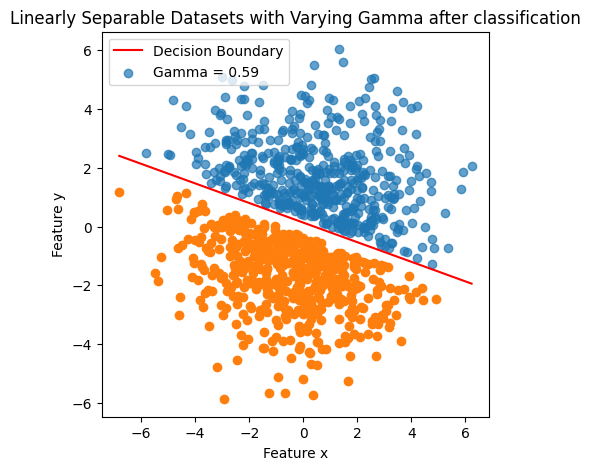

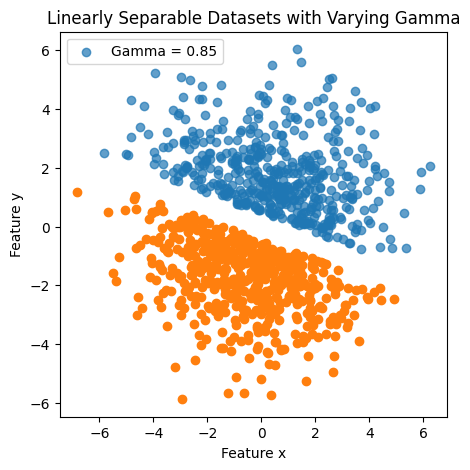

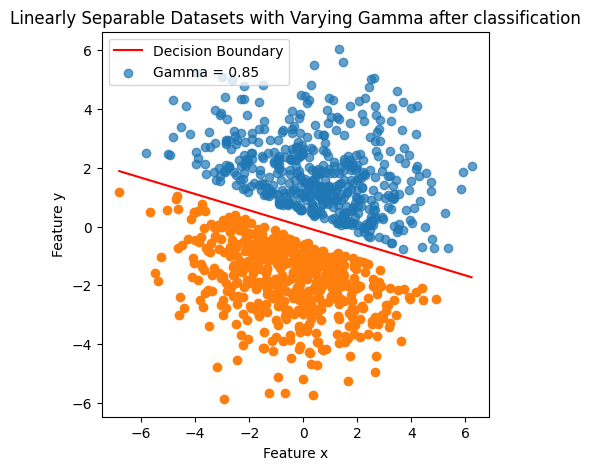

In [4]:
gamma_values = [ 0.01 , 0.09 , 0.3 , 0.59 , 0.85 ]
dataset_size = 1000
avg_iterations = []
avg_epocs = []
plot_datasets(dataset_size , gamma_values)
for gamma in gamma_values:
    # X, y = create_dataset(dataset_size, gamma)
    avg_convergence_iter , avg_convergence_epocs = average_iterations_single_gamma(gamma)
    avg_iterations.append(avg_convergence_iter)
    avg_epocs.append(avg_convergence_epocs)

# Plot results or analyze as needed


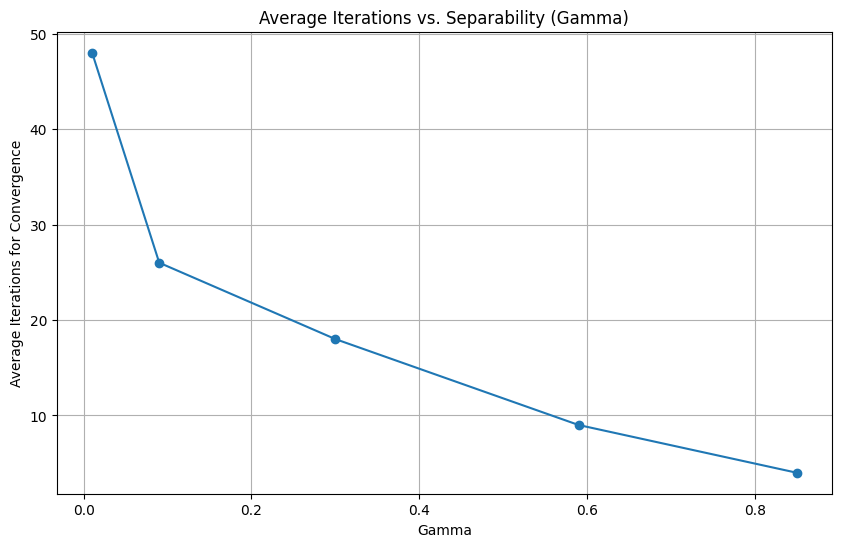

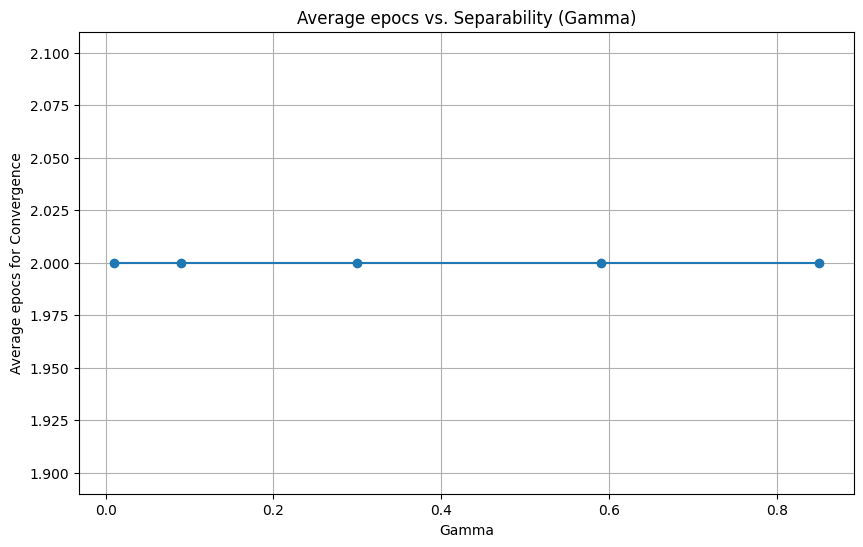

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, avg_iterations, marker='o')
plt.title("Average Iterations vs. Separability (Gamma)")
plt.xlabel("Gamma")
plt.ylabel("Average Iterations for Convergence")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, avg_epocs, marker='o')
plt.title("Average epocs vs. Separability (Gamma)")
plt.xlabel("Gamma")
plt.ylabel("Average epocs for Convergence")
plt.grid(True)
plt.show()


***we can observe that with increasing values of gamma the no of iterations for the perceptron to converge is decreasing***



# **QUESTION 2:**

In [6]:
def generate_dataset_with_margin_Q2(size, margin, target_size=1000):
    np.random.seed(41)

    # Generate a larger number of random points

    X = np.random.normal(0, 2, size=(5 * target_size, 2))

    # Define a line as a decision boundary
    decision_boundary = np.random.rand(2)  # Random weights for the decision boundary
    decision_boundary /= np.linalg.norm(decision_boundary)  # Normalize to unit length

    # Compute distances from each point to the decision boundary
    distances = np.dot(X, decision_boundary)

    # Remove points falling inside the margin
    mask = (distances > margin / 2) | (distances < -margin / 2)
    X_filtered = X[mask][:target_size]
    y = np.where(distances[mask][:target_size] > 0, 1, 0)

    return X_filtered, y

In [7]:
# Define logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#we are using binary cross entropy loss funcction.
def loss_function(X, y, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss


def gradient_descent(X, y, learning_rate, epochs):
    # Initialize weights
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradient
        gradient = np.dot(X.T, (predictions - y)) / len(y)

        # Update weights
        weights -= learning_rate * gradient

        # Print loss every 100 epochs
        if epoch % 1000 == 0:
            loss = loss_function(X, y, weights)
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights

def plot_dataset_Q2(X, y , weights , title):
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Class 1')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='+', label='Class -1')
    plt.title(title)
    plt.legend()
    x_line = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_line = (-weights[0] / weights[2]) - (weights[1] / weights[2]) * x_line
    plt.plot(x_line, y_line, color='red', label='Decision Boundary')
    plt.show()

    # Plot the decision boundary line

    # plt.title('Linear Classifier Decision Boundary')

**plotting the datasets with and without classifier**

Epoch 0, Loss: 0.6868430302015017
Epoch 1000, Loss: 0.17147330097944216
Epoch 2000, Loss: 0.13398034711838394
Epoch 3000, Loss: 0.11645322117451369
Epoch 4000, Loss: 0.10561558244993269
Epoch 5000, Loss: 0.09800291890632716
Epoch 6000, Loss: 0.09224551543702483
Epoch 7000, Loss: 0.08767544728983194
Epoch 8000, Loss: 0.08392180319782709
Epoch 9000, Loss: 0.08075937445885985


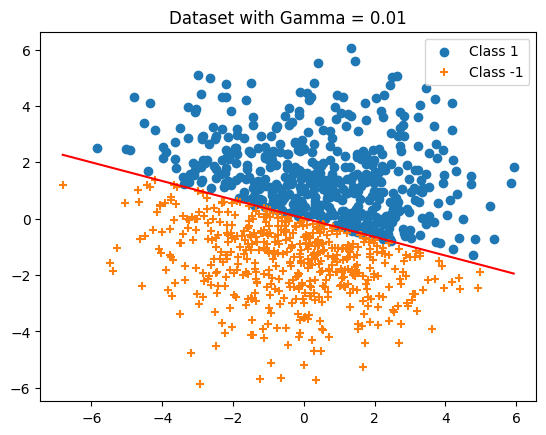

Epoch 0, Loss: 0.6865581008714837
Epoch 1000, Loss: 0.15790773949192183
Epoch 2000, Loss: 0.12024363346148216
Epoch 3000, Loss: 0.10267871781086381
Epoch 4000, Loss: 0.09184009639790026
Epoch 5000, Loss: 0.08424232684033447
Epoch 6000, Loss: 0.07850782557698018
Epoch 7000, Loss: 0.07396494372614171
Epoch 8000, Loss: 0.07024078121143526
Epoch 9000, Loss: 0.06710898822298109


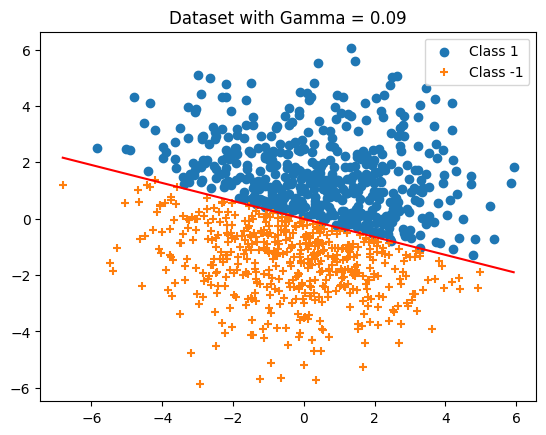

Epoch 0, Loss: 0.6859058494346034
Epoch 1000, Loss: 0.13282260795263198
Epoch 2000, Loss: 0.09573923662583479
Epoch 3000, Loss: 0.07872451559445563
Epoch 4000, Loss: 0.06836205961282593
Epoch 5000, Loss: 0.061180767708943436
Epoch 6000, Loss: 0.0558164401131127
Epoch 7000, Loss: 0.051607186116404684
Epoch 8000, Loss: 0.04818713866016226
Epoch 9000, Loss: 0.045335121286277626


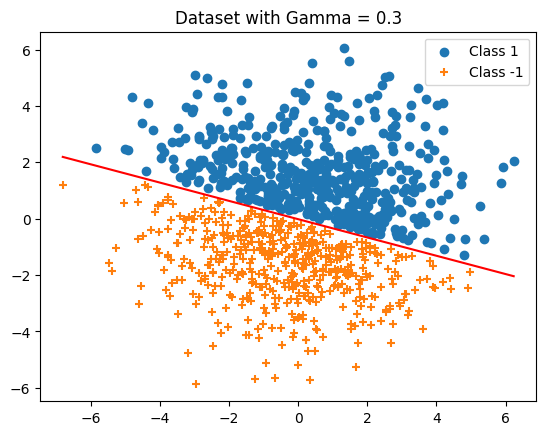

Epoch 0, Loss: 0.6850812160624923
Epoch 1000, Loss: 0.1062873774271098
Epoch 2000, Loss: 0.0714040766239192
Epoch 3000, Loss: 0.055977277004288076
Epoch 4000, Loss: 0.0468485664478699
Epoch 5000, Loss: 0.04067516296290136
Epoch 6000, Loss: 0.03616208272773589
Epoch 7000, Loss: 0.03268886789172829
Epoch 8000, Loss: 0.029916448633661483
Epoch 9000, Loss: 0.027642008001981026


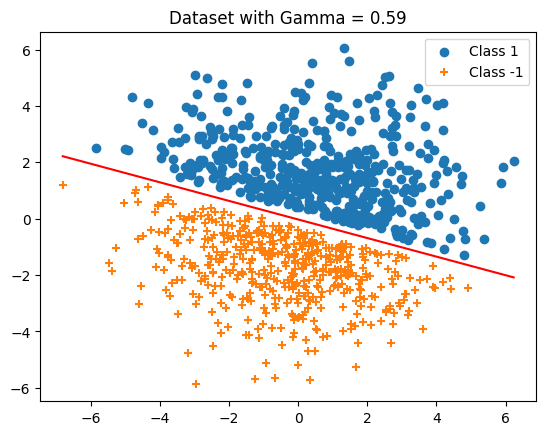

Epoch 0, Loss: 0.6843982573959634
Epoch 1000, Loss: 0.08952822527428793
Epoch 2000, Loss: 0.0574388006362435
Epoch 3000, Loss: 0.043756294343816296
Epoch 4000, Loss: 0.03586259280863767
Epoch 5000, Loss: 0.03062837889078746
Epoch 6000, Loss: 0.026863081131221076
Epoch 7000, Loss: 0.02400468312735792
Epoch 8000, Loss: 0.02174993741565318
Epoch 9000, Loss: 0.01991947064518372


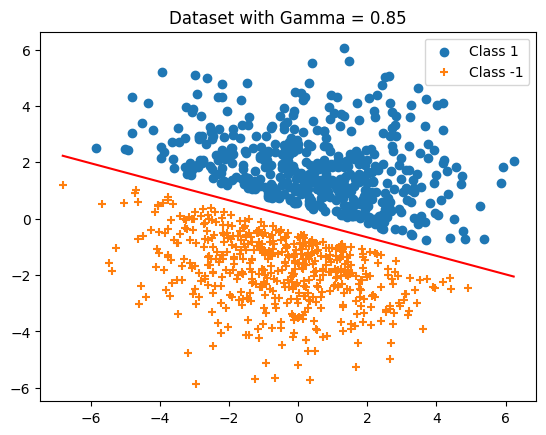

In [8]:
gamma_values = [ 0.01 , 0.09 , 0.3 , 0.59 , 0.85 ]
dataset_size = 1000
learning_rate = 0.01
epochs = 10000
for gamma in gamma_values:
    X, y = generate_dataset_with_margin_Q2(dataset_size, gamma)

    # Add a bias term to the features
    X_bias = np.c_[np.ones(X.shape[0]), X]

    # Train linear classifier using gradient descent
    weights = gradient_descent(X_bias, y, learning_rate, epochs)
    plot_dataset_Q2(X, y, weights , f'Dataset with Gamma = {gamma}')

    # Plot dataset after training
    # plot_dataset_Q2(X, np.sign(np.dot(X_bias, weights)), f'Classifier with Gamma = {gamma}')

# **QUESTION 3**

**Generate Concentric Circles Dataset**

In [9]:

def generateConcentricCircles(samples , radius_inner=1, radius_outer=2, gap=1.5):
    theta = np.random.rand(samples) * 2 * np.pi

    radius_inner *= gap
    xInnerCircle = radius_inner * np.cos(theta)
    yInnerCircle = radius_inner * np.sin(theta)

    xOuterCircle = radius_outer * np.cos(theta)
    yOuterCircle = radius_outer * np.sin(theta)

    labelsInnerCircle = np.zeros(samples)
    labelsOuterCircle = np.ones(samples)

    X = np.vstack((np.column_stack((xInnerCircle, yInnerCircle)), np.column_stack((xOuterCircle, yOuterCircle))))
    y = np.concatenate((labelsInnerCircle, labelsOuterCircle))


    return X, y

**Sigmoid Activation Function and its Derivative**

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return x * (1 - x)

**Initialize Weights and Biases**

In [11]:
def initialize_weights_and_biases(sizeOfInput, hiddenLayerSize, sizeOfOutput):
    weightsOfHiddenip = np.random.rand(sizeOfInput, hiddenLayerSize)
    hiddenLayerBias = np.zeros((1, hiddenLayerSize))

    weightsOfHiddenOp = np.random.rand(hiddenLayerSize, sizeOfOutput)
    OutputBias = np.zeros((1, sizeOfOutput))

    return weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias

**Forward Pass**

In [12]:
def forward_pass(X, weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias):
    hiddenInput = np.dot(X, weightsOfHiddenip) + hiddenLayerBias
    hiddenOutput = sigmoid(hiddenInput)

    outputLayerInput = np.dot(hiddenOutput, weightsOfHiddenOp) + OutputBias
    predictedOutput = sigmoid(outputLayerInput)

    return hiddenOutput, predictedOutput

**Backpropagation**

In [13]:
def backpropagation(X, y, learningRate, epochs, weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias):
    for epoch in range(epochs):
        hiddenOutput, predictedOutput = forward_pass(X, weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias)
        error = y.reshape(-1, 1) - predictedOutput

        outputDelta = error * sigmoidDerivative(predictedOutput)
        hiddenError = outputDelta.dot(weightsOfHiddenOp.T)
        hiddenDelta = hiddenError * sigmoidDerivative(hiddenOutput)

        weightsOfHiddenOp += hiddenOutput.T.dot(outputDelta) * learningRate
        OutputBias += np.sum(outputDelta, axis=0, keepdims=True) * learningRate

        weightsOfHiddenip += X.T.dot(hiddenDelta) * learningRate
        hiddenLayerBias += np.sum(hiddenDelta, axis=0, keepdims=True) * learningRate

        if epoch % 1000 == 0:
            loss = np.mean(0.5 * (y - predictedOutput) ** 2)
            print(f'Epoch {epoch}, Loss: {loss}')

    return weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias

**Plot Decision Boundary**

In [14]:
def plot_decision_boundary(X, y, weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    hiddenOutput, predictedOutput = forward_pass(np.c_[xx.ravel(), yy.ravel()], weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias)
    Z = (predictedOutput > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

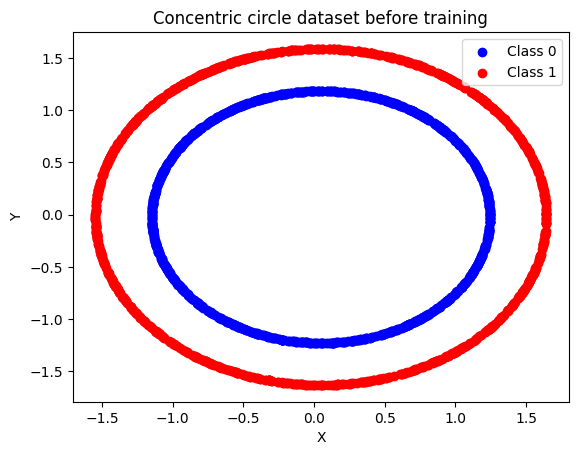

Epoch 0, Loss: 0.19690649044702732
Epoch 1000, Loss: 0.22602654445786904
Epoch 2000, Loss: 0.23511000240151442
Epoch 3000, Loss: 0.23849958510609387
Epoch 4000, Loss: 0.24036054672509216
Epoch 5000, Loss: 0.2415683637515041
Epoch 6000, Loss: 0.2424297178582635
Epoch 7000, Loss: 0.24308237528452564
Epoch 8000, Loss: 0.24359826911465615
Epoch 9000, Loss: 0.24401898350130377


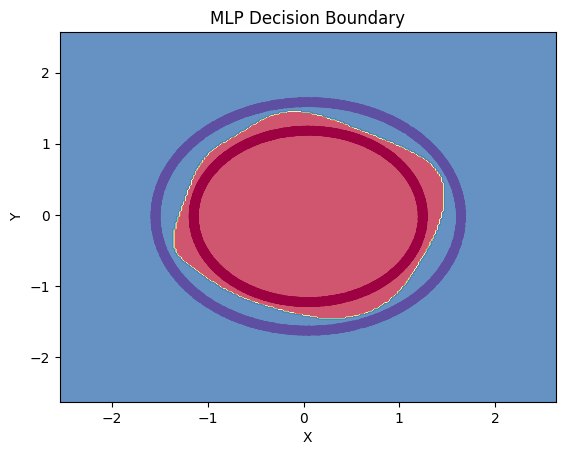

In [15]:
# Generate and Normalize Dataset
X, y = generateConcentricCircles(samples=1000, radius_inner=1, radius_outer=2, gap=1.5)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


# Plot dataset before training
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', color='red')
plt.title('Concentric circle dataset before training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Initialize Weights and Biases
weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias = initialize_weights_and_biases(sizeOfInput=2, hiddenLayerSize=8, sizeOfOutput=1)

# Train MLP using Backpropagation
weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias = backpropagation(X, y, learningRate=0.01, epochs=10000,
                                                                                   weightsOfHiddenip=weightsOfHiddenip,
                                                                                   hiddenLayerBias=hiddenLayerBias,
                                                                                   weightsOfHiddenOp=weightsOfHiddenOp,
                                                                                   OutputBias=OutputBias)
# Plot decision boundary after training
plot_decision_boundary(X, y, weightsOfHiddenip, hiddenLayerBias, weightsOfHiddenOp, OutputBias, "MLP Decision Boundary")